# Transformações e histograma

## A. Aplicar a transformação logarítmica, testar vários valores para o parâmetro c "s = c log (1 + r)"
## B. Aplicar a transformação de potência (gama), testar vários valores para o parâmetro γ e c=1 "s = crγ"
## C. Implemente a representação de cada plano de bits das imagens
## D. Implementar a equalização do histograma 

### Importando bibliotecas

In [277]:
import numpy as np
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt

### print_final_result(img, img2, function_name, param_c=None, param_gamma=None) :: void
função responsável por imprimir o resultado final da transformação aplicada nas imagens.

In [278]:
def print_final_result(img_path1, img_path2, title, function, param_c= None, param_gamma= None):
    
    img1 = Image.open(img_path1)
    f_img1 = asarray(img1)
    img2= Image.open(img_path2)
    f_img2 = asarray(img2)
    
    print(title)
    
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(wspace=0.1, hspace=0) 
    plt1 = plt.subplot(1,3,1)
    plt2 = plt.subplot(1,3,2)
    
    plt1.set_title('Enhanced')
    plt2.set_title('Spine')

    if(title.find('logarítmica') != -1):
        plt1.imshow(function(f_img1, param_c), cmap='gray', vmin=0, vmax=255)
        plt2.imshow(function(f_img2, param_c), cmap='gray', vmin=0, vmax=255)
    elif(title.find('potência') != -1):
        plt1.imshow(function(f_img1, param_c, param_gamma), cmap='gray', vmin=0, vmax=255)
        plt2.imshow(function(f_img2, param_c, param_gamma), cmap='gray', vmin=0, vmax=255)
    else:
        plt1.imshow(function(f_img1), cmap='gray', vmin=0, vmax=255)
        plt2.imshow(function(f_img2), cmap='gray', vmin=0, vmax=255)

    plt.show()
    print()

## Exercício A: Transformação logarítmica


### apply_logarithmic_transformation(img, c) :: img
função responsável por aplicar a transformação logarítmica na imagem, variando o valor de c de 1 a 100 iterando de 10 em 10. 

### exercicioA() :: void
função responsável por mostrar as imagens originais e por chamar a função apply_logarithmic_transformation(img, c) para cada valor de c e imprimir o resultado final.

In [279]:
def apply_logarithmic_transformation(image, param_c):
    # Apply the logarithmic transformation: s = c * log(1 + r)
    transformed_image = param_c * np.log1p(image)
    return np.clip(transformed_image, 0, 255).astype(np.uint8)

def exercicioA():
    print_final_result('enhance-me.gif', 'fractured_spine.tif', 'Imagens originais', lambda x: x)
    
    for i in range(1, 102, 10):
        print_final_result('enhance-me.gif', 'fractured_spine.tif', f'Imagens com transformação logarítmica c={i}', apply_logarithmic_transformation, param_c=i)

### apply_power_law_transformation(img, gamma, c=1) :: img
função responsável por aplicar a transformação de potência na imagem utilizando o valor de c=1 e o valor de gamma passado por parâmetro, retornando a imagem transformada.

### exercicioB() :: void
função responsável por mostrar as imagens originais e por chamar a função apply_power_law_transformation(img, gamma, c=1) mantendo o valor fixo de c=1 e variando o valor de gamma de 0 a 25 iterando de 2.5 em 2.5. e por fim imprimir o resultado.


In [280]:
# Apply the power law transformation: s = c * r ^ gamma
def apply_power_law_transformation(image, gamma, param_c=1):   
    transformed_image = param_c * np.power(image, gamma)
    return np.clip(transformed_image, 0, 255).astype(np.uint8)

def exercicioB():
    print_final_result('enhance-me.gif', 'fractured_spine.tif', 'Imagens originais', lambda x: x)
    j=0 
    while j<=25:
        print_final_result('enhance-me.gif', 'fractured_spine.tif', f'Imagem com transformação potência c=1 e gamma={j}', apply_power_law_transformation, param_c=1, param_gamma=j)
        j+=2.5

### show_bit_planes(img) :: void
função responsável por mostrar os planos de bits da imagem passada por parâmetro, como a possui 8 bits, serão mostrados 8 planos de bits.

### exercicioC() :: void
função responsável por mostrar as imagens originais e por chamar a função show_bit_planes(img) para cada imagem original e também para a mesma equalizada e por fim imprimir o resultado.

In [281]:

def show_bit_planes(img):
    # Show the bit planes of the image
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(wspace=0.1, hspace=0.2) 
    for i in range(8):
        plt.subplot(4, 4, i+1)
        plt.imshow((img & (1 << i)) >> i, cmap='gray')
        plt.axis('off')
        plt.title(f'Bit plane {i+1}')
    plt.show()
    
def exercicioC():
    print_final_result('enhance-me.gif', 'fractured_spine.tif', 'Imagens originais', lambda x: x)
    img = Image.open('enhance-me.gif')
    f_img = asarray(img)
    eq_f_img = apply_histogram_equalization(f_img)
    print('BitPlane com imagem aplicada equalização de histograma')
    show_bit_planes(eq_f_img)
    print('BitPlane com imagem original')
    show_bit_planes(f_img)
    
    
    img = Image.open('fractured_spine.tif')
    f_img = asarray(img)
    eq_f_img = apply_histogram_equalization(f_img)
    print('BitPlane com imagem aplicada equalização de histograma')
    show_bit_planes(eq_f_img)
    print('BitPlane com imagem original')
    show_bit_planes(f_img)

### apply_median_filter(img, kernel_size=1) :: img
função responsável por aplicar o filtro da mediana na imagem passada por parâmetro, utilizando o tamanho do kernel passado por parâmetro, caso não seja passado nenhum valor, o tamanho do kernel será 1.

### convert_to_gray(img) :: img
função responsável por converter a imagem passada por parâmetro para escala de cinza.

### instantiate_histogram(img) :: void
função responsável por instanciar o histograma da imagem passada por parâmetro.

### count_intensity_values(img) :: void
função responsável por contar a quantidade de valores de intensidade da imagem passada por parâmetro.

### plot_hist(img) :: void
função responsável por plotar o histograma da imagem passada por parâmetro.

### get_hist_prob(img) :: [str]
função responsável por retornar a probabilidade de cada valor de intensidade da imagem passada por parâmetro.

### get_accumulate_prob (img) :: [str]
função responsável por retornar a probabilidade acumulada de cada valor de intensidade da imagem passada por parâmetro.

### get_new_gray_value(img) :: [str]
função responsável por retornar o novo valor de intensidade de cada valor de intensidade da imagem passada por parâmetro.

### apply_histogram_equalization(img) :: img
função responsável por aplicar a equalização do histograma e chamar as outras funções auxiliares para retornar a imagem com o histograma equalizado.

### exercicioD() :: void
função responsável por mostrar as imagens originais e por chamar a função apply_histogram_equalization(img) para cada imagem e por fim imprimir o resultado.


In [282]:
# def apply_histogram_equalization(image):
#     hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
#     cdf = hist.cumsum()
#     cdf_normalized = cdf * hist.max() / cdf.max()
#     equalized_image = np.interp(image, bins[:-1], cdf_normalized)
#     return equalized_image.astype(np.uint8)

def apply_median_filter(image, kernel_size=1):
    # Apply the median filter using numpy and neighborhood operation
    l, c = image.shape[0], image.shape[1]
    k = kernel_size
    
    for x in range(k, l - k):
        for y in range(k, c - k):
            s_xy = image[x-k:x+k+1, y-k:y+k+1]
            image[x, y] = np.median(s_xy).astype(int)
    return image

def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]        
        
    gray_image = np.ceil(np.dot(image[...,:3], params))
 
    # Saturando os valores em 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

def instantiate_histogram():    
    hist_array= []
    
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    
    return hist_dct

def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
     
    return hist


def plot_hist(hist, hist2=''):
    if hist2 != '':
        x_ticks = np.arange(0, 270, 16)
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].set_title('Histograma equalizado')
        axarr[1].grid(True)
        axarr[1].axes.xaxis.set_ticks(x_ticks)
        
        axarr[1].bar(hist2.keys(), hist2.values())
        axarr[0].set_title('Histograma original')
        axarr[0].grid(True)
        axarr[0].axes.xaxis.set_ticks(x_ticks)
        
        
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        
    
    plt.show()
    
def get_hist_proba(hist, n_pixels):
    hist_proba = {}
    for i in range(0, 256):
        hist_proba[str(i)] = hist[str(i)] / n_pixels
    
    return hist_proba

def get_accumulated_proba(hist_proba): 
    acc_proba = {}
    sum_proba = 0
    
    for i in range(256):
        if i == 0:
            pass
        else: 
            sum_proba += hist_proba[str(i - 1)]
            
        acc_proba[str(i)] = hist_proba[str(i)] + sum_proba
        
    return acc_proba
    
def get_new_gray_value(acc_proba):
    new_gray_value = {}
    
    for i in range(0, 256):
        new_gray_value[str(i)] = int(np.ceil(acc_proba[str(i)] * 255))
        
    return new_gray_value

def equalize_hist(img, new_gray_value):
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            img[row][column] = new_gray_value[str(int(img[row][column]))]
            
    return img
        
def apply_histogram_equalization(image, display=False):
    histogram0 = instantiate_histogram()

    n_pixels = image.shape[0] * image.shape[1]

    histogram0 = count_intensity_values(histogram0, image)
    
    hist_proba = get_hist_proba(histogram0, n_pixels)

    accumulated_proba = get_accumulated_proba(hist_proba)
    
    new_gray_value = get_new_gray_value(accumulated_proba)
    eq_img = equalize_hist(image.copy(), new_gray_value)
    
    histogram1 = instantiate_histogram()
    histogram1 = count_intensity_values(histogram1, eq_img)
    eq_img = apply_median_filter(eq_img)
    
    if display:
        print('Histograma: quantidade de pixels por nível de intensidade')
        
        plot_hist(histogram0, histogram1)
    
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))

        axarr[0].set_title('Imagem original')
        axarr[1].set_title('Imagem equalizada e aplicado filtro mediana')

        axarr[0].imshow(image, cmap='gray', vmin=0, vmax=255)
        axarr[1].imshow(eq_img, cmap='gray', vmin=0, vmax=255)
        plt.show()
          
    return eq_img

def exercicioD():
    img1 = Image.open('enhance-me.gif')
    f_img1 = asarray(img1)
    img2= Image.open('fractured_spine.tif')
    f_img2 = asarray(img2)
    eq_img1 = apply_histogram_equalization(f_img1, display=True)
    eq_img2 = apply_histogram_equalization(f_img2, display=True)
    

Imagens originais


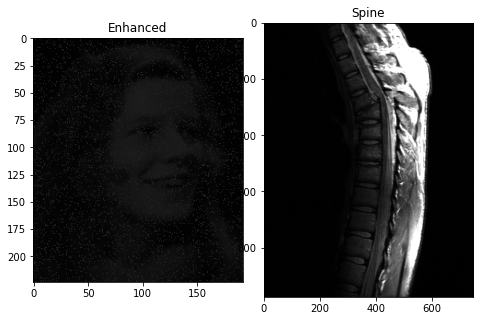


Imagens com transformação logarítmica c=1


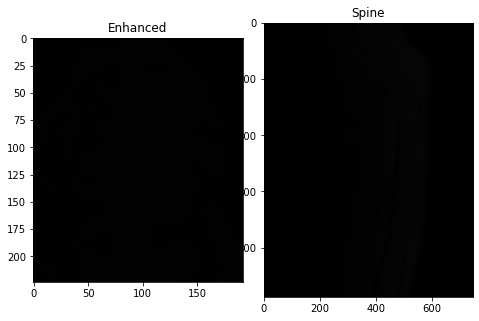


Imagens com transformação logarítmica c=11


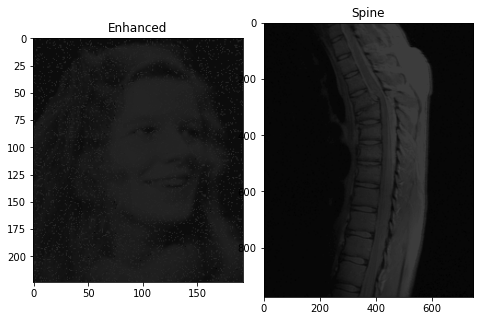


Imagens com transformação logarítmica c=21


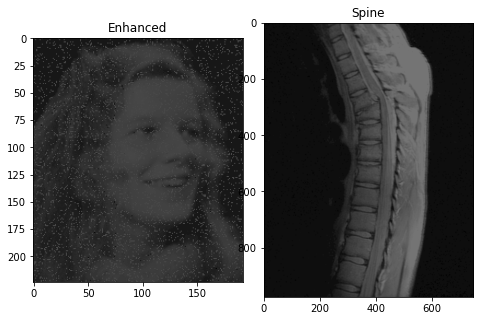


Imagens com transformação logarítmica c=31


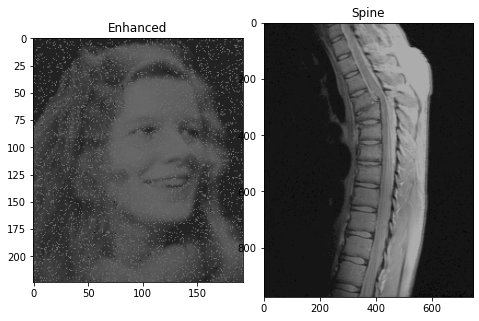


Imagens com transformação logarítmica c=41


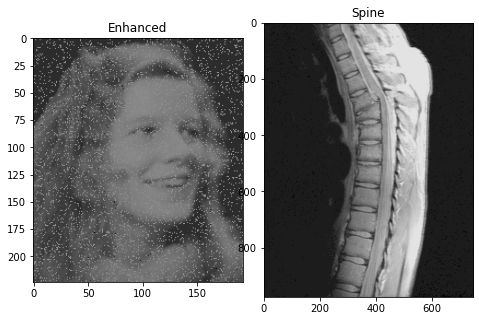


Imagens com transformação logarítmica c=51


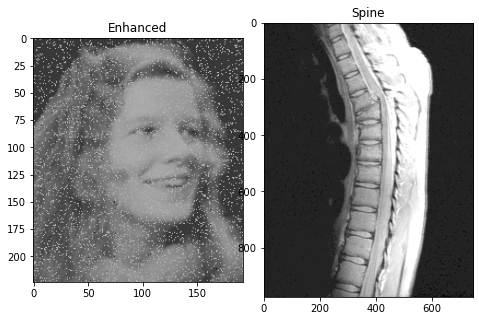


Imagens com transformação logarítmica c=61


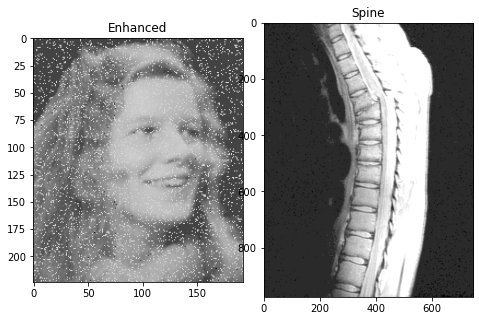


Imagens com transformação logarítmica c=71


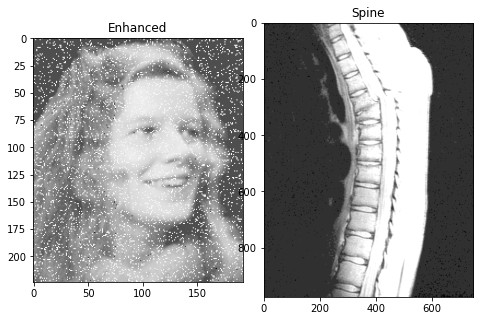


Imagens com transformação logarítmica c=81


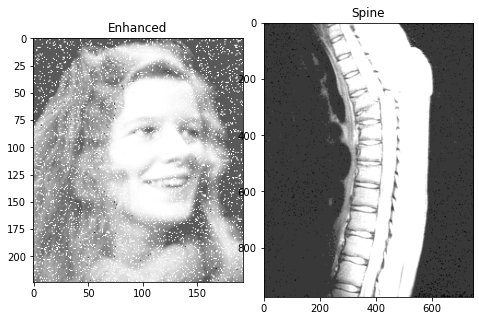


Imagens com transformação logarítmica c=91


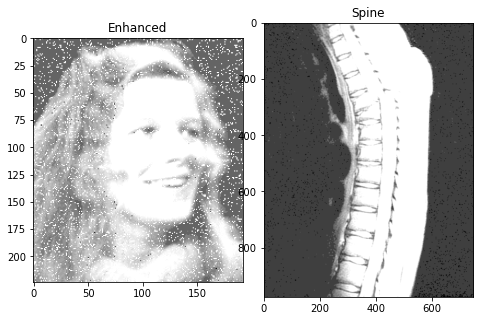


Imagens com transformação logarítmica c=101


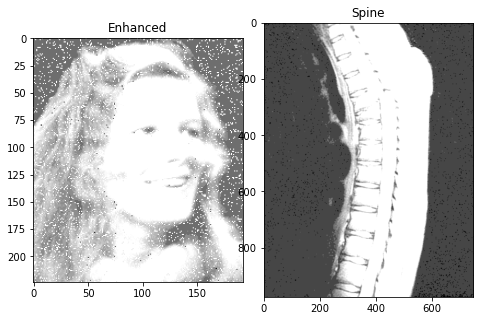


Imagens originais


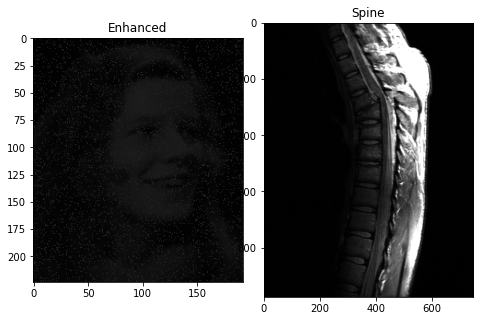


Imagem com transformação potência c=1 e gamma=0


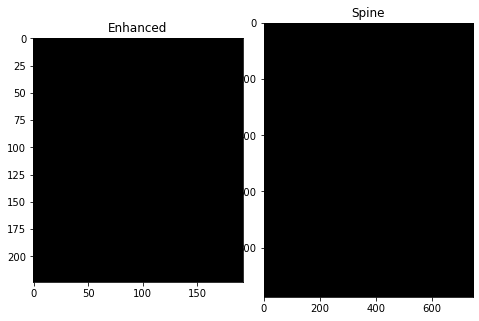


Imagem com transformação potência c=1 e gamma=2.5


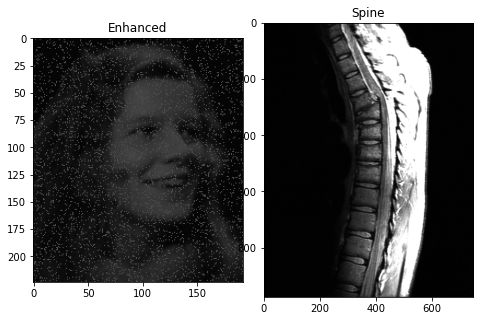


Imagem com transformação potência c=1 e gamma=5.0


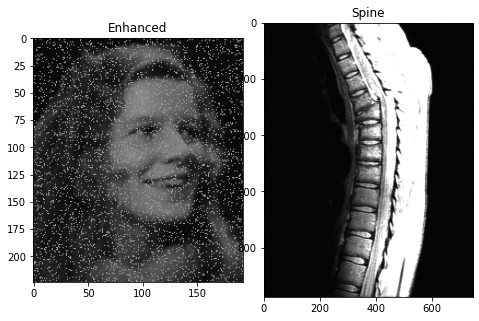


Imagem com transformação potência c=1 e gamma=7.5


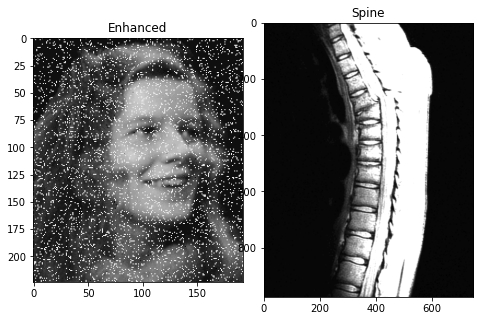


Imagem com transformação potência c=1 e gamma=10.0


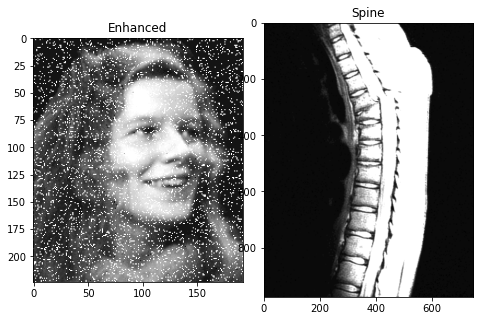


Imagem com transformação potência c=1 e gamma=12.5


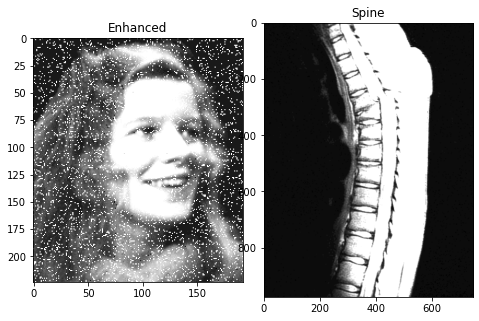


Imagem com transformação potência c=1 e gamma=15.0


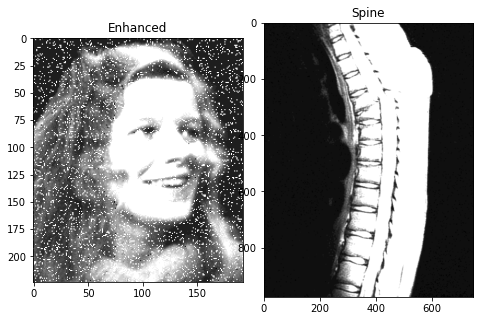


Imagem com transformação potência c=1 e gamma=17.5


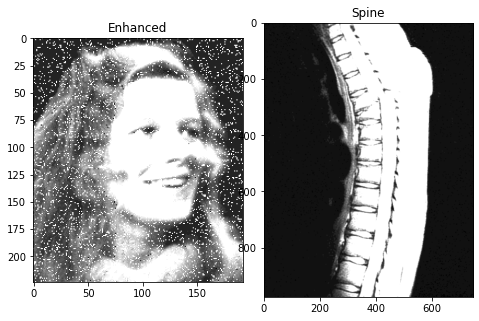


Imagem com transformação potência c=1 e gamma=20.0


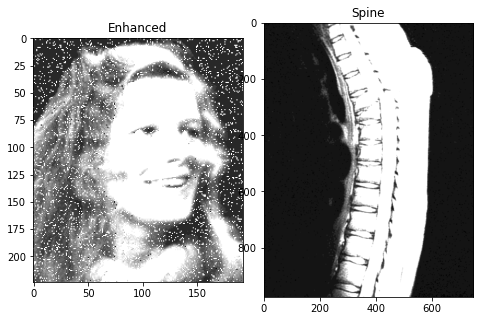


Imagem com transformação potência c=1 e gamma=22.5


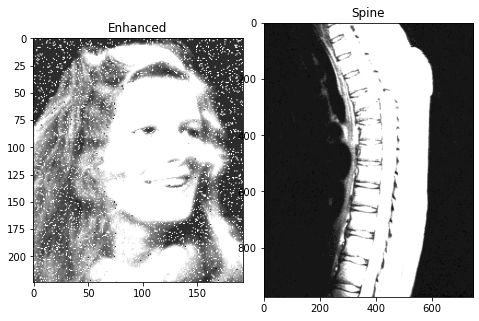


Imagem com transformação potência c=1 e gamma=25.0


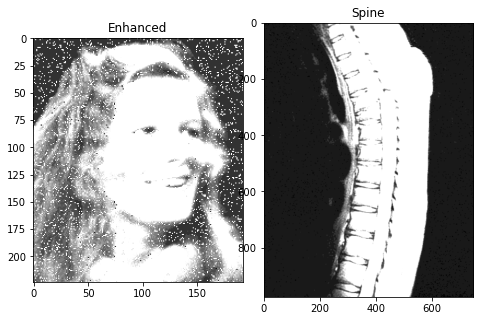


Imagens originais


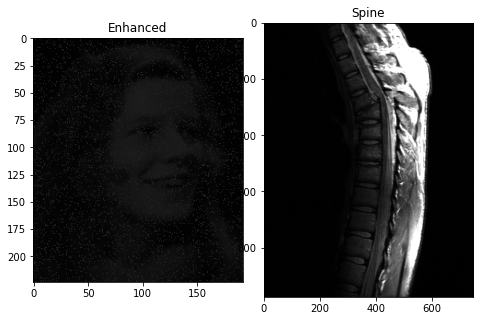


BitPlane com imagem aplicada equalização de histograma


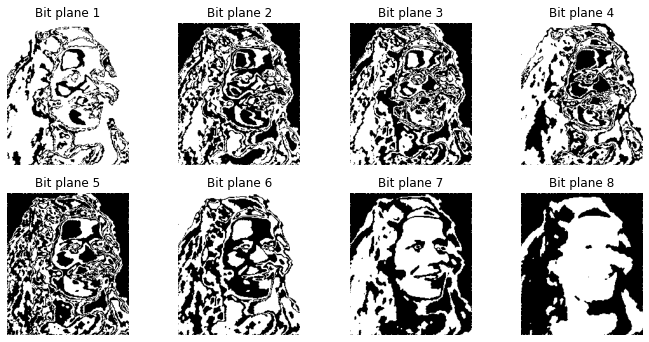

BitPlane com imagem original


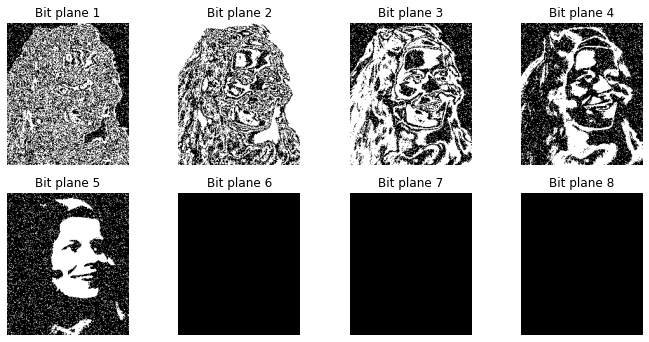

BitPlane com imagem aplicada equalização de histograma


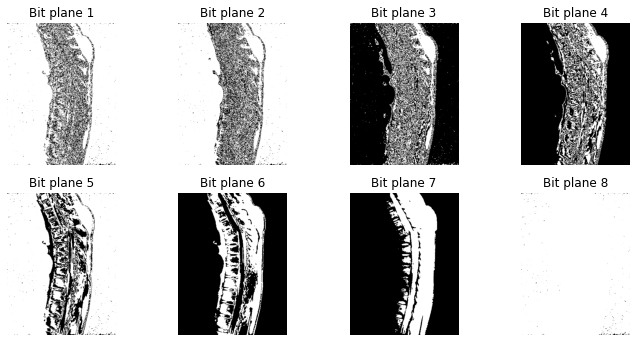

BitPlane com imagem original


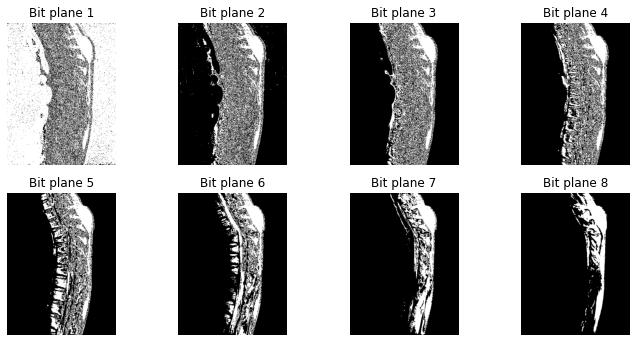

Histograma: quantidade de pixels por nível de intensidade


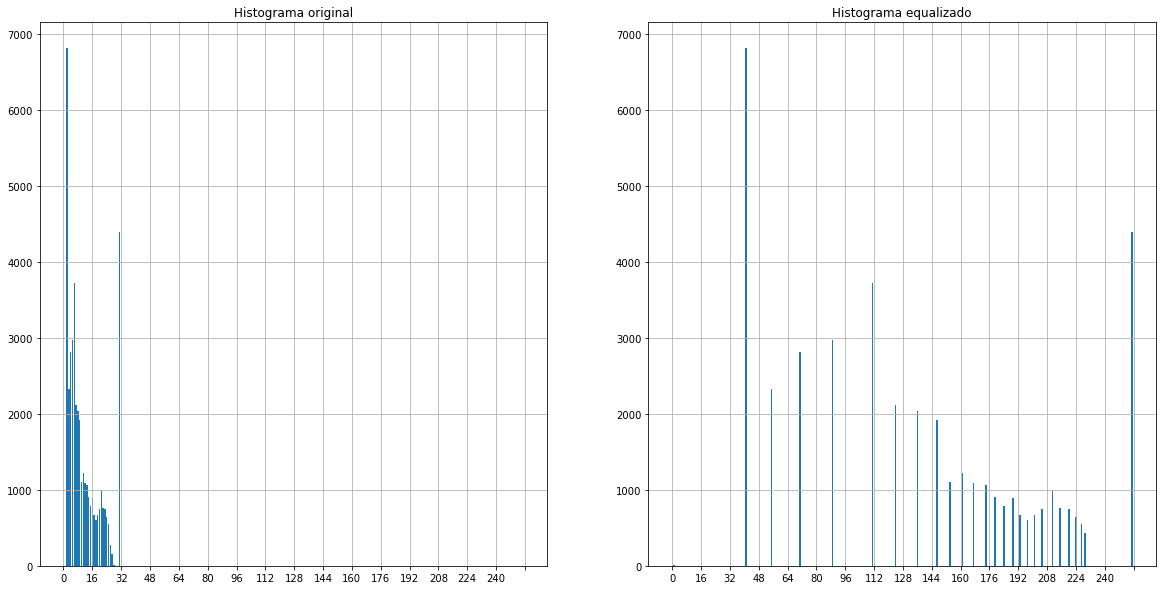

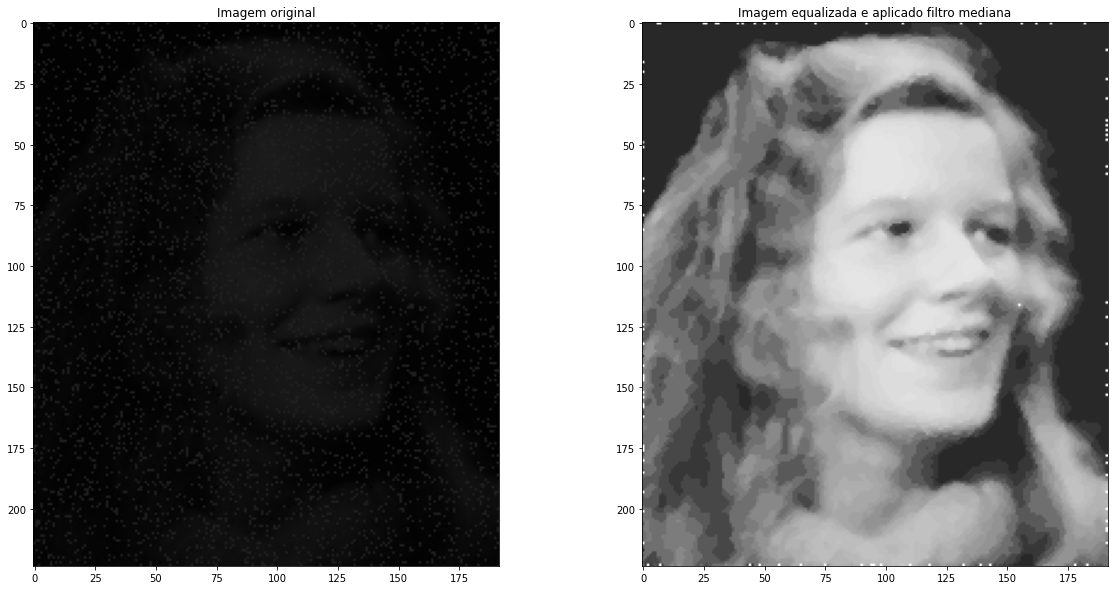

Histograma: quantidade de pixels por nível de intensidade


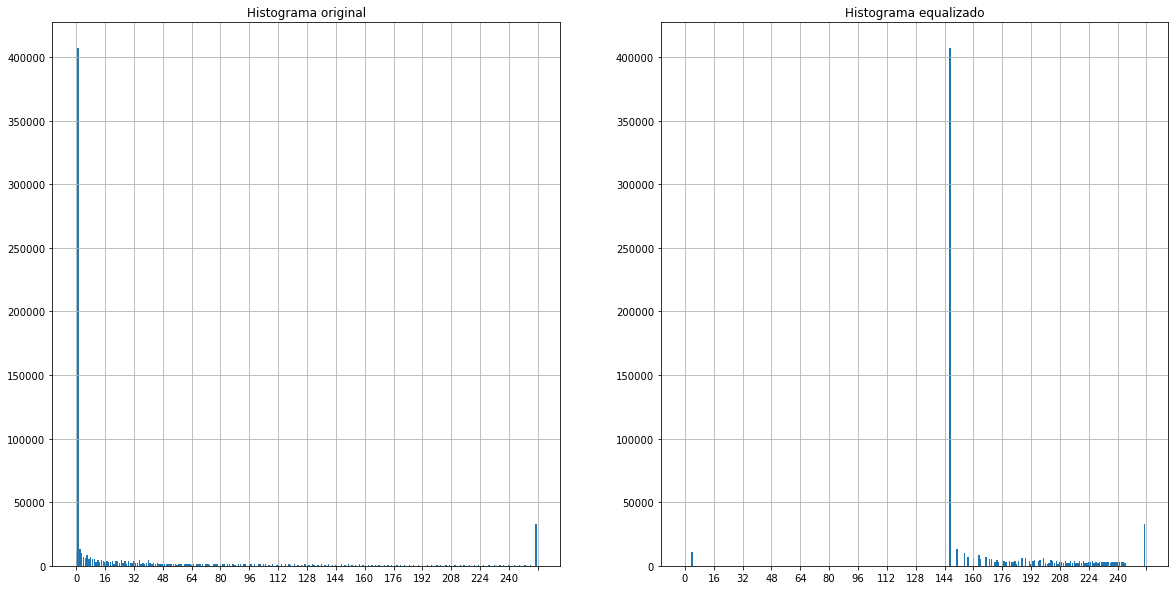

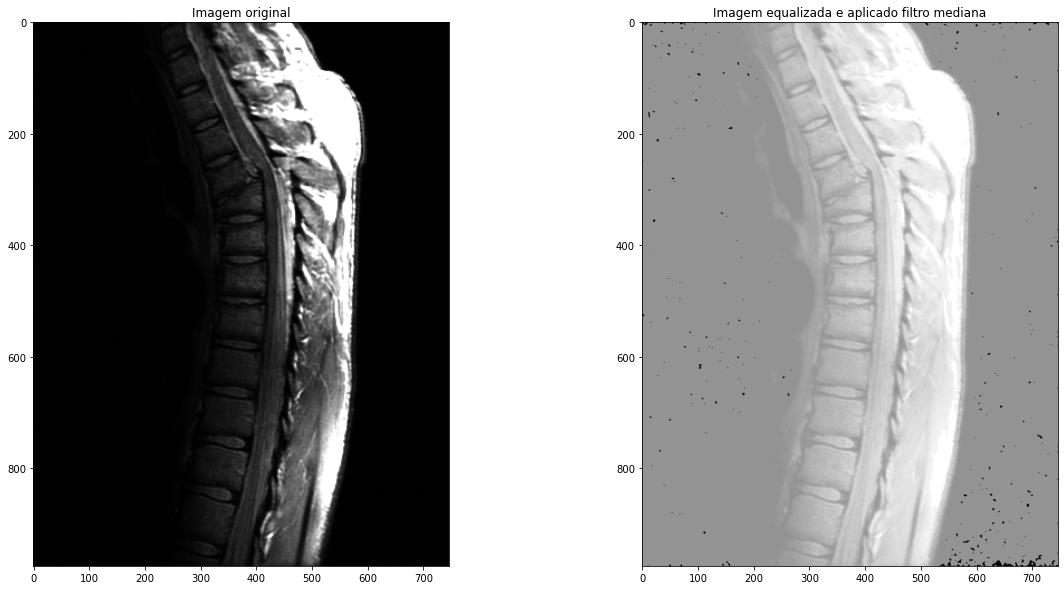

In [283]:
if __name__ == "__main__" :
    exercicioA()
    exercicioB()
    exercicioC()
    exercicioD()
    